# Import packages

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from warnings import simplefilter
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import PassiveAggressiveRegressor
import matplotlib.pyplot as plt

# Import and Preprocess the data

In [45]:
wsb = pd.read_csv('jantofebScrape.csv')
del wsb['Post ID']
#del wsb['Title']
del wsb['Url']
del wsb['Author']
del wsb['Permalink']
del wsb['Flair']

#simplefilter(action='ignore', category=FutureWarning)

prev = datetime.strptime('2020-01-01 00:05:21', '%Y-%m-%d %H:%M:%S').date()
wsb_dates = []
score_dict = {}
comment_dict = {}
wsb_dict = {}
count = 0
comments = 0
score = 0
#Gets Upvote Score and number of comments per post
for row in wsb['Publish Date']:
    date_time_str = row
    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S').date()
    if(prev < date_time_obj):
        score = 0
        comments = 0
        wsb_dates.append(date_time_obj)
        prev = date_time_obj
    else:
        score += wsb['Score'][count]
        #Gets sentiment score from post title    
        if '💎' or 'diamond' in wsb['Title']:
            score *= 1
        if 'hold' in wsb['Title']:
            score *= 1
        if 'still' in wsb['Title']:
            score *= 1
        if 'tend' in wsb['Title']:
            score *= 1
        if '🚀' or 'rocket' in wsb['Title']:
            score *= 1
        if 'sell' in wsb['Title']:
            score *= -1
        if 'paper' in wsb['Title']:
            score *= -1
        if 'buy' in wsb['Title']:
            score *= 1
        comments += wsb['Total No. of Comments'][count]
        count += 1
    wsb_dict[date_time_obj] = [score, comments]
    score_dict[date_time_obj] = score
    comment_dict[date_time_obj] = comments
        
data = pd.DataFrame.from_dict(wsb_dict)
print(data)


gme_prices = pd.read_csv('GME_2021-01-01-2021-02-01.csv').values
#Gets change in open and close price data of GME   
price_data=[-1.75,-1.75,-1.75]
count=0
for i in gme_prices:
    if len(price_data)>=31:
        break
    count+=1
    price_data.append(i[4]-i[1])
         
    if(count==6):
        price_data.append(i[4]-i[1])
        price_data.append(i[4]-i[1])
        price_data.append(i[4]-i[1])
        count=0
            
gme = pd.DataFrame.from_dict(price_data)

print(price_data)
print(gme)

   2021-01-01  2021-01-02  2021-01-03  2021-01-04  2021-01-05  2021-01-06  \
0          24          18          12          42          39          57   
1         789         647           3         629        2156         285   

   2021-01-07  2021-01-08  2021-01-09  2021-01-10  ...  2021-01-22  \
0          61          88          26          16  ...         918   
1          97        1018         279          91  ...      123309   

   2021-01-23  2021-01-24  2021-01-25  2021-01-26  2021-01-27  2021-01-28  \
0         460         440        2090         596       65210       29424   
1       10296         818        1721         905      126505      270317   

   2021-01-29  2021-01-30  2021-01-31  
0        7195        7177      218555  
1      148776       48688       74568  

[2 rows x 31 columns]
[-1.75, -1.75, -1.75, -1.75, 0.020000459999998554, 1.0200004599999986, -0.38999938999999983, -0.48999978000000155, 0.5300006800000006, 0.5300006800000006, 0.5300006800000006, 0.53000

# Plotting the data

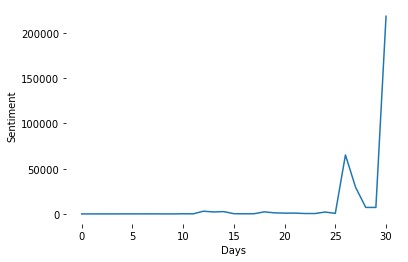

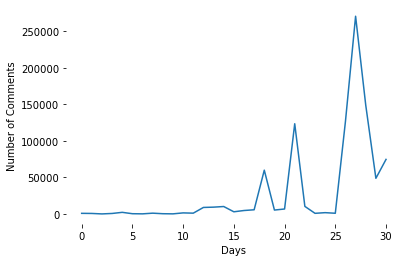

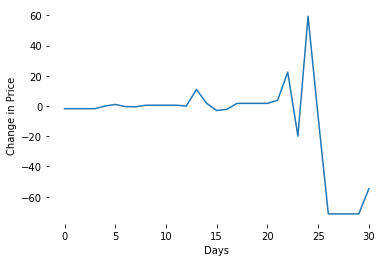

In [46]:
data = data.values
gme=gme.values

plt.figure(1)
plt.plot(data[0])
plt.xlabel('Days')
plt.ylabel('Sentiment')
plt.box(False)

plt.figure(2)
plt.plot(data[1])
plt.xlabel('Days')
plt.ylabel('Number of Comments')
plt.box(False)

plt.figure(3)
plt.plot(gme)
plt.xlabel('Days')
plt.ylabel('Change in Price')
plt.box(False)


# Regression Models

# Ridge Regression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data[0],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print("Ridge")
alph=1
scores=[]
for i in range(100):
    clf = Ridge(alpha=alph)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
    alph-=.01
print(np.mean(scores))

Ridge
-0.060515711494360996


In [48]:
X_train, X_test, y_train, y_test = train_test_split(data[1],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

alph=1
scores=[]
for i in range(100):
    clf = Ridge(alpha=alph)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
    alph-=.01
print(np.mean(scores))

0.17193537932355477


# Random Forest

In [57]:
print("Random Forest")
X_train, X_test, y_train, y_test = train_test_split(data[0],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

clf=RandomForestRegressor(max_depth=2, random_state=0).fit(X_train,y_train.ravel())
print(clf.score(X_test,y_test))

Random Forest
0.7832296997808375


In [50]:
X_train, X_test, y_train, y_test = train_test_split(data[1],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

clf=RandomForestRegressor(max_depth=2, random_state=0).fit(X_train,y_train.ravel())
print(clf.score(X_test,y_test))

-0.03172402432540555


# Bayesian Ridge

In [51]:
print("Bayesian Ridge")
X_train, X_test, y_train, y_test = train_test_split(data[0],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

clf=linear_model.BayesianRidge().fit(X_train,y_train.ravel())
print(clf.score(X_test,y_test))

Bayesian Ridge
-0.06041316558852916


In [52]:
X_train, X_test, y_train, y_test = train_test_split(data[1],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

clf=linear_model.BayesianRidge().fit(X_train,y_train.ravel())
print(clf.score(X_test,y_test))

0.17168147963222347


# PLS

In [53]:
print("PLS")
X_train, X_test, y_train, y_test = train_test_split(data[0],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

clf=PLSRegression(n_components=1).fit(X_train,y_train.ravel())
print(clf.score(X_test,y_test))

PLS
-0.06051571149454604


In [54]:
X_train, X_test, y_train, y_test = train_test_split(data[1],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

clf=PLSRegression(n_components=1).fit(X_train,y_train.ravel())
print(clf.score(X_test,y_test))

0.17193537932428682


# Passive Aggresive

In [55]:
print("Passive Aggressive")

X_train, X_test, y_train, y_test = train_test_split(data[0],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

clf=PassiveAggressiveRegressor(max_iter=100, random_state=0).fit(X_train,y_train.ravel())
print(clf.score(X_test,y_test))

Passive Aggressive
-0.5695644105356883


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data[1],gme, test_size=0.10, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

clf=PassiveAggressiveRegressor(max_iter=100, random_state=0).fit(X_train,y_train.ravel())
print(clf.score(X_test,y_test))

0.4998056682176457
